In [34]:
import os
import graphviz
import pandas as pd
from sklearn import metrics # Importar metricas
from IPython.display import Image
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz # Importar el classificador

In [12]:
df = pd.read_csv("./data/rating-peliculas.csv")

In [13]:
df.describe()

,ratings-rotten,ratings-audiencia,costo-millones-usd,ano-estreno
count,559.000000,559.000000,559.000000,559.000000
mean,47.309481,58.744186,50.236136,2009.152057
std,26.413091,16.826887,48.731817,1.362632
min,0.000000,0.000000,0.000000,2007.000000
25%,25.000000,47.000000,20.000000,2008.000000
50%,46.000000,58.000000,35.000000,2009.000000
75%,70.000000,72.000000,65.000000,2010.000000
max,97.000000,96.000000,300.000000,2011.000000


In [14]:
df.columns

Index(['pelicula', 'genero', 'ratings-rotten', 'ratings-audiencia',
       'costo-millones-usd', 'ano-estreno'],
      dtype='object')

In [15]:
y = df["genero"]
y.value_counts()

Comedy       172
Action       154
Drama        101
Horror        49
Thriller      36
Adventure     29
Romance       18
Name: genero, dtype: int64

In [16]:
len(y)

559

In [19]:
X = df.drop(["pelicula","genero"], axis=1)
X.head()

,ratings-rotten,ratings-audiencia,costo-millones-usd,ano-estreno
0,87,81,8,2009
1,9,44,105,2008
2,30,52,20,2009
3,93,84,18,2010
4,55,70,20,2009


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [57]:
clf = DecisionTreeClassifier(criterion = "entropy", max_depth = 5)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [58]:
y_pred

array(['Romance', 'Action', 'Comedy', 'Comedy', 'Comedy', 'Comedy',
       'Action', 'Action', 'Comedy', 'Comedy', 'Action', 'Action',
       'Comedy', 'Romance', 'Comedy', 'Comedy', 'Drama', 'Action',
       'Comedy', 'Comedy', 'Comedy', 'Comedy', 'Comedy', 'Comedy',
       'Comedy', 'Action', 'Comedy', 'Comedy', 'Comedy', 'Comedy',
       'Comedy', 'Action', 'Action', 'Action', 'Action', 'Comedy',
       'Comedy', 'Comedy', 'Action', 'Comedy', 'Action', 'Action',
       'Drama', 'Comedy', 'Comedy', 'Action', 'Action', 'Comedy', 'Drama',
       'Comedy', 'Comedy', 'Comedy', 'Comedy', 'Comedy', 'Comedy',
       'Comedy', 'Comedy', 'Comedy', 'Action', 'Comedy', 'Horror',
       'Drama', 'Action', 'Comedy', 'Adventure', 'Thriller', 'Thriller',
       'Comedy', 'Comedy', 'Comedy', 'Action', 'Comedy', 'Drama',
       'Comedy', 'Horror', 'Drama', 'Comedy', 'Comedy', 'Comedy',
       'Comedy', 'Action', 'Comedy', 'Horror', 'Comedy', 'Action',
       'Action', 'Action', 'Action', 'Comedy', 'C

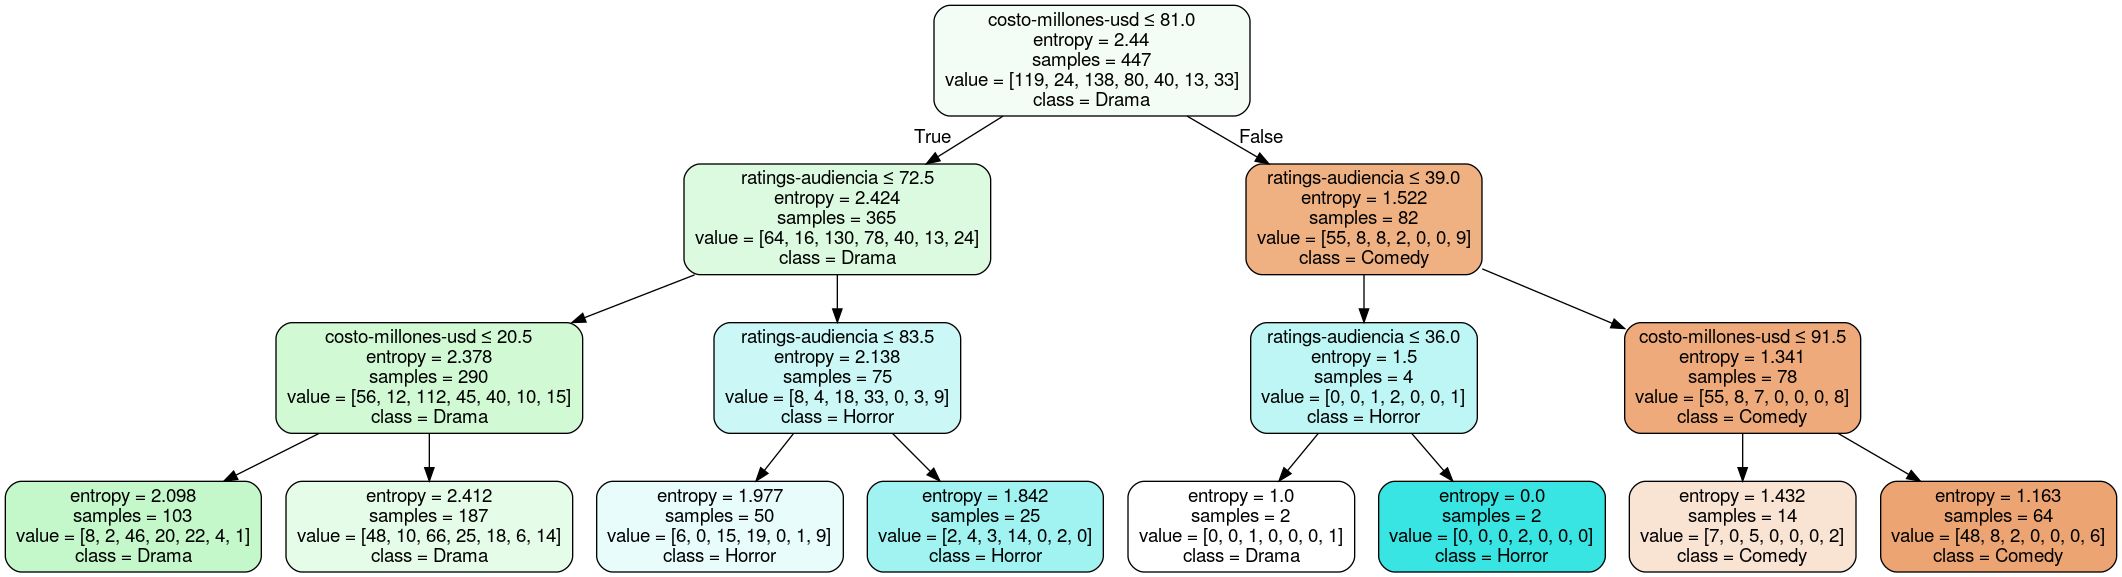

In [59]:
export_graphviz(clf,
                out_file=None, 
                filled = True, 
                rounded = True, special_characters = True, 
                feature_names = X.columns, 
                class_names = y.value_counts().index)

graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png("peliculas.png")
Image(graph.create_png())

In [61]:
metrics.accuracy_score(y_test, y_pred)

0.35714285714285715